In [139]:
from utils import load_mch
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

## 測試train data

In [224]:
path = "output/quicktest/mcx_output/quicktest_700.mch"
df, header = load_mch(path)
df = pd.DataFrame(df)
df.columns = ["idx", "scatter", "m0", "m1", "m2", "m3", "m4", "x", "y", "z", "dx", "dy", "dz", "weight"]
df.head(5), header
# dff += [df]
# hh  += [header]
mua = np.array([0.07, 0.1, 0.2, 50, 20])
pl = df[df.idx==1].iloc[:, 2:7].values
white = np.exp(np.matmul(-pl, mua)).sum()/2e7
native = df[df.idx==1].weight.sum()/2e7
print("white: ", white)
print("native mcx: ", native)

white:  7.271243175741935e-06
native mcx:  0.02217775


In [225]:
header

{'version': 1,
 'maxmedia': 5,
 'detnum': 3,
 'colcount': 14,
 'total_photon': 2000000000,
 'detected': 923719,
 'saved_photon': 923719,
 'unitmm': 0.25,
 'seed_byte': 0,
 'normalize': 1.600000023841858,
 'respin': 1}

In [216]:
ref = []

In [217]:
dff = []
hh = []
for i in range(10):
    os.system("python run.py")
    path = "output/quicktest/mcx_output/quicktest_700.mch"
    df, header = load_mch(path)
    df = pd.DataFrame(df)
    df.columns = ["idx", "scatter", "m0", "m1", "m2", "m3", "m4", "x", "y", "z", "dx", "dy", "dz", "weight"]
    df.head(5), header
    dff += [df]
    hh  += [header]
    mua = np.array([0.07, 0.1, 0.2, 50, 20])
    pl = df[df.idx==1].iloc[:, 2:7].values
    white = np.exp(np.matmul(-pl, mua)).sum()/2e7
    native = df[df.idx==1].weight.sum()/2e7
    print("white: ", white)
    print("native mcx: ", native)
    ref += [np.exp(np.matmul(-pl, mua)).sum()/2e7]
    ref

white:  7.344244958396303e-08
native mcx:  0.00877595
white:  6.175444304896102e-08
native mcx:  0.00871055
white:  6.910844210204606e-08
native mcx:  0.00875035
white:  5.96792073085182e-08
native mcx:  0.0087885
white:  5.995214317404781e-08
native mcx:  0.00873685
white:  5.188347362727416e-08
native mcx:  0.00875045
white:  4.934898692193973e-08
native mcx:  0.0087325
white:  5.322054756926757e-08
native mcx:  0.008774
white:  7.360980808197688e-08
native mcx:  0.00875765
white:  4.7246089530481836e-08
native mcx:  0.00878115


In [223]:
np.std(ref)/np.mean(ref)

0.1529413401184236

In [220]:
for i in range(10):
    print(hh[i]["detected"])

326355
325204
325803
326501
324730
325793
324850
326183
325757
326756


In [204]:
mua = np.array([0.1, 0.1, 0.1, 0.5, 0])
pl = df[df.idx==1].iloc[:, 2:7].values
white = np.exp(np.matmul(-pl, mua)).sum()/2e7
native = df[df.idx==1].weight.sum()/2e7
print("white: ", white)
print("native mcx: ", native)
ref += [np.exp(np.matmul(-pl, mua)).sum()/2e7]
ref

white:  1.960367777670524e-09
native mcx:  8.325e-05


[3.016372140071212e-09,
 2.5375742505091124e-09,
 2.3078853815249952e-09,
 3.088972735724363e-09,
 2.1559938775138227e-09,
 2.113881758146279e-09,
 3.353496493582495e-09,
 3.0611018443411886e-09,
 2.158960672448357e-09,
 1.960367777670524e-09]

In [205]:
np.std(ref)/np.mean(ref)


0.18674355302496026

In [206]:
r2e7 = [3.016372140071212e-09,
 2.5375742505091124e-09,
 2.3078853815249952e-09,
 3.088972735724363e-09,
 2.1559938775138227e-09,
 2.113881758146279e-09,
 3.353496493582495e-09,
 3.0611018443411886e-09,
 2.158960672448357e-09,
 1.960367777670524e-09]



In [126]:
from MySQLdb import connect
import os 
con = connect(
    host="140.112.174.26",
    user="md703",
    passwd="MD703",
    db="ijv"
)

In [130]:
ijv = pd.read_sql("SELECT DISTINCT skin_mus, fat_mus, muscle_mus, ijv_mus, cca_mus FROM ijv_ann_2", con=con)
ijv.head(1)

,skin_mus,fat_mus,muscle_mus,ijv_mus,cca_mus
0,5.18862,12.9606,7.96249,9.13444,21.6706


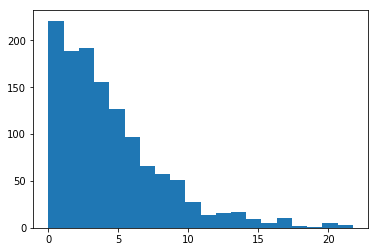

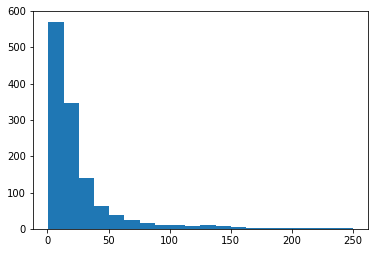

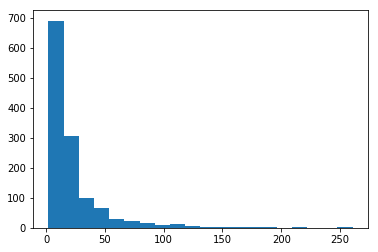

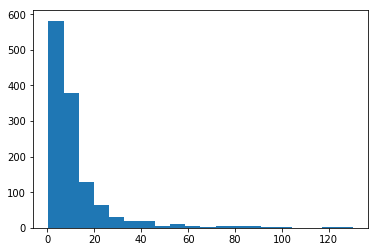

In [142]:
b = 20
plt.hist(ijv.skin_mus, bins=b)
plt.show()
plt.hist(ijv.fat_mus, bins=b)
plt.show()
plt.hist(ijv.muscle_mus, bins=b)
plt.show()
plt.hist(ijv.ijv_mus, bins=b)
plt.show()


In [211]:
ijv_abs = pd.read_sql("SELECT DISTINCT skin_mua, fat_mua, muscle_mua, ijv_mua, cca_mua FROM ijv_ann_2", con=con)


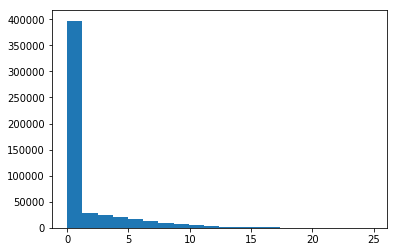

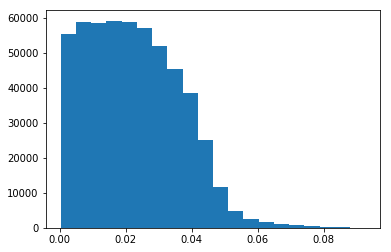

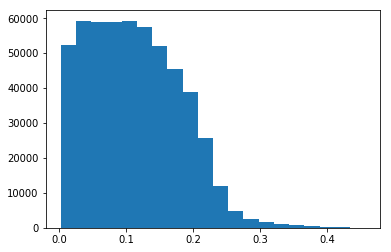

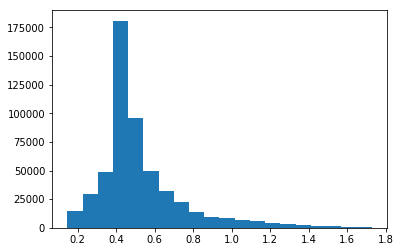

In [212]:
b = 20
plt.hist(ijv_abs.skin_mua, bins=b)
plt.show()
plt.hist(ijv_abs.fat_mua, bins=b)
plt.show()
plt.hist(ijv_abs.muscle_mua, bins=b)
plt.show()
plt.hist(ijv_abs.ijv_mua, bins=b)
plt.show()

In [256]:
d.mean()

20804.37927512113

In [257]:
d.max(), d.min()

(103669432.0, 0.0)

In [260]:
dr.max(), dr.min()

(0.0, 0.0)